In [18]:
library(reshape2)
library(ggplot2)

In [19]:
newYorkClinical <- read.csv("WHO_NREVSS_Clinical_Labs.csv", skip =1)
newYorkClinical <- newYorkClinical[c(14:65),]

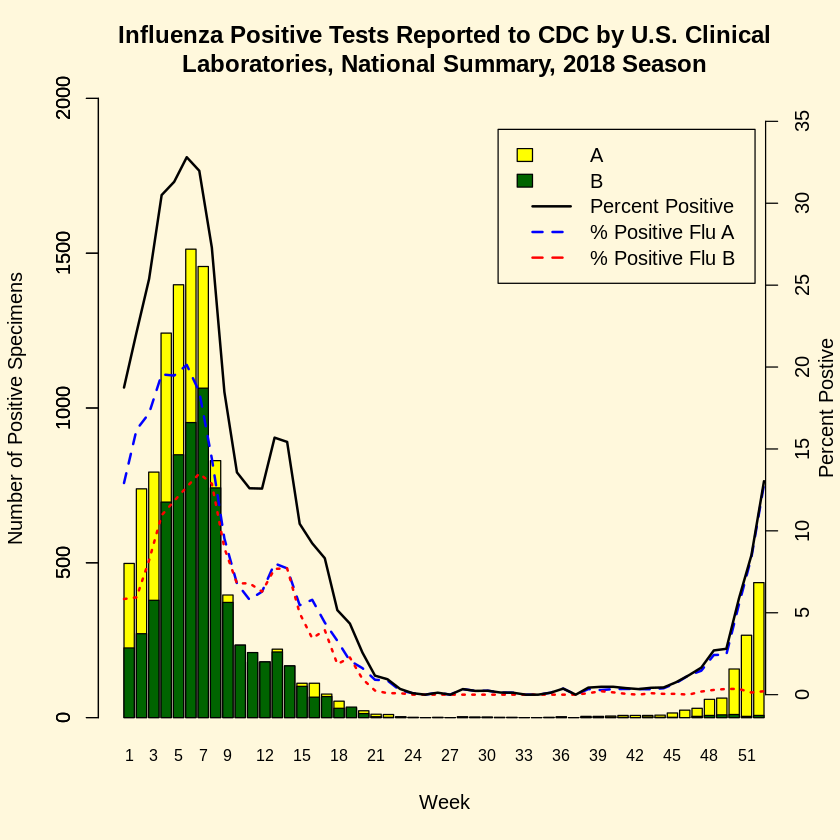

In [20]:
par(bg='cornsilk' )

barplot(newYorkClinical$TOTAL.A, names.arg = newYorkClinical$WEEK, 
        cex.names = 0.8,
        ylim = c(0,2000), col='yellow', xlab="Week", ylab="Number of Positive Specimens", )
par(new = T)
barplot(newYorkClinical$TOTAL.B, ylim = c(0,2000), col='darkgreen')

par(new = T)
#Plot Percent Positive line

plot(newYorkClinical$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 35), axes = F, ann = F)
# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )
lines(newYorkClinical$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(newYorkClinical$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)
title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018 Season")
legend("topright", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA), lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))

In [32]:
newYorkPublic <- read.csv("WHO_NREVSS_Public_Health_Labs.csv", skip = 1)

In [33]:
data <- data.frame(
    A.Substring = newYorkPublic$A..Subtyping.not.Performed, 
    A.2009 = newYorkPublic$A..2009.H1N1,
    A.H3 = newYorkPublic$A..H3, 
    H3N2v = newYorkPublic$H3N2v, 
    B = newYorkPublic$B,
    BVic = newYorkPublic$BVic, 
    B.Yam = newYorkPublic$BYam,
  row.names = newYorkPublic$SEASON_DESCRIPTION
)
data$SEASON_DESCRIPTION <- row.names(data)
mdata <- melt(data, id.vars = "SEASON_DESCRIPTION")
weeks = factor(mdata$SEASON_DESCRIPTION, levels = unique(mdata$SEASON_DESCRIPTION))

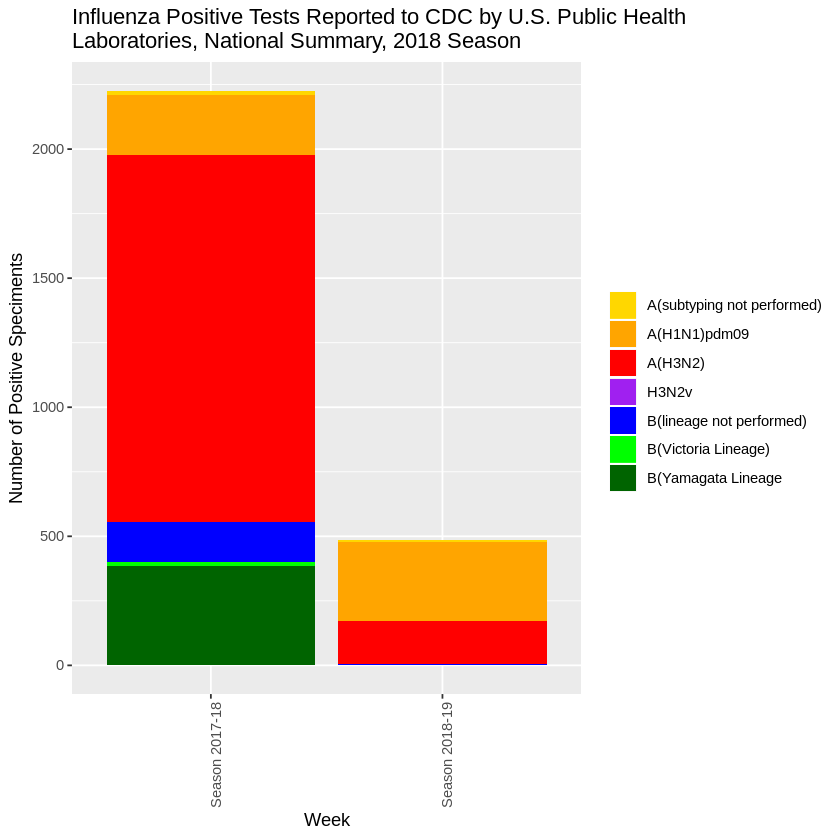

In [37]:
legendLabel = c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)", "H3N2v",
                "B(lineage not performed)", "B(Victoria Lineage)", "B(Yamagata Lineage")
color = c("gold","orange", "red", "purple", "blue", "green", "darkgreen")
positiveTest2018 <- ggplot(mdata, aes(x = weeks, y = value, fill = variable)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2018 Season", 
    y = "Number of Positive Speciments", x = "Week") + 
    scale_fill_manual(labels = legendLabel, values = color) +
    geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    guides (fill = guide_legend(title = "")) 
positiveTest2018